In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('rides_bootcamp.csv')
#df.info()

In [98]:
#TODO usuniecie duplikatow dla grupowania: vehicle_id, ride_id, timestamp, type

In [99]:
#TODO usunac dane gdzie speed = 0 (w dataframe po pivot)
# usunac dane gdzie obroty sa za niskie????? (jazda na wcisnietym sprzegle/luzie)

In [100]:
# ciekawe wykresy samochodow: 7

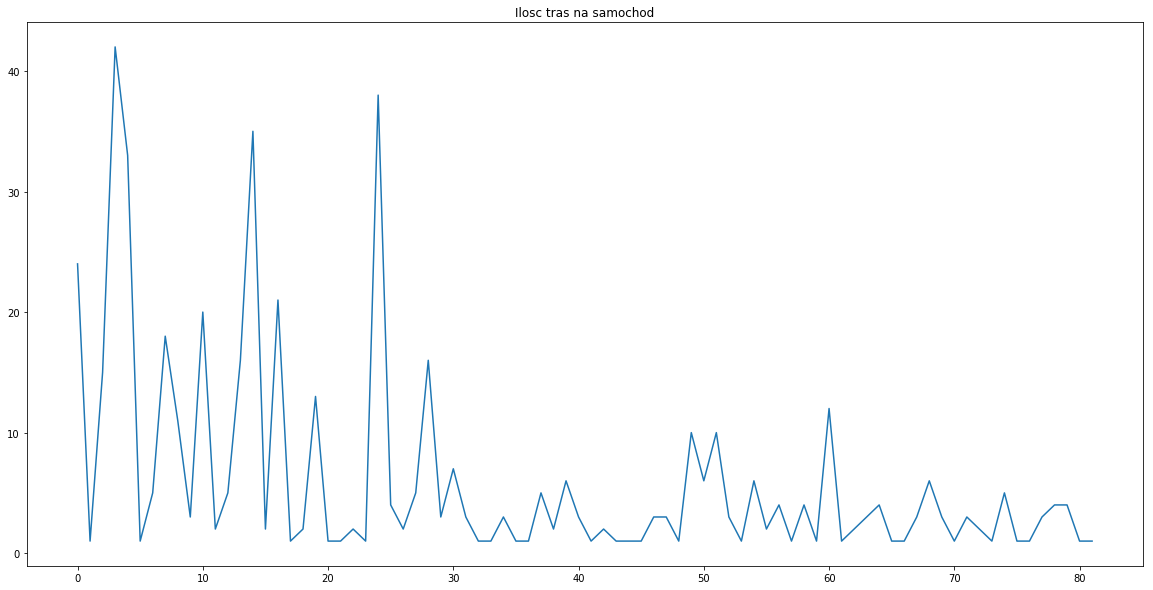

In [101]:
plt.figure(figsize=(20,10))
plt.plot(df.groupby(by='vehicle_id')['ride_id'].nunique().values)
plt.title('Ilosc tras na samochod')
plt.show()

In [102]:
# najwiecej tras dla samochodow:
df.groupby(by='vehicle_id')['ride_id'].nunique().sort_values(ascending=False).head(10)

vehicle_id
4     42
25    38
15    35
5     33
1     24
17    21
11    20
8     18
29    16
14    16
Name: ride_id, dtype: int64

In [103]:
# losowanie samochodu i trasy
vehicle_ids = df['vehicle_id'].unique()
vehicle_id = np.random.choice(vehicle_ids)
ride_ids = df[df['vehicle_id']==vehicle_id]['ride_id'].unique()
ride_id = np.random.choice(ride_ids)
vehicle_id, ride_id

(81, 497)

In [107]:
df11 = df[(df['vehicle_id']==vehicle_id) & (df['ride_id']==ride_id)]
df11.head()

,vehicle_id,ride_id,timestamp,type,result
1095772,81,497,1494178099,rpm,2220
1095773,81,497,1494178099,rpm,2230
1095774,81,497,1494178100,rpm,2220
1095775,81,497,1494178101,rpm,2210
1095776,81,497,1494178103,rpm,2160


In [84]:
df11_rpm = df11[df11['type']=='rpm']
df11_speed = df11[df11['type']=='speed']

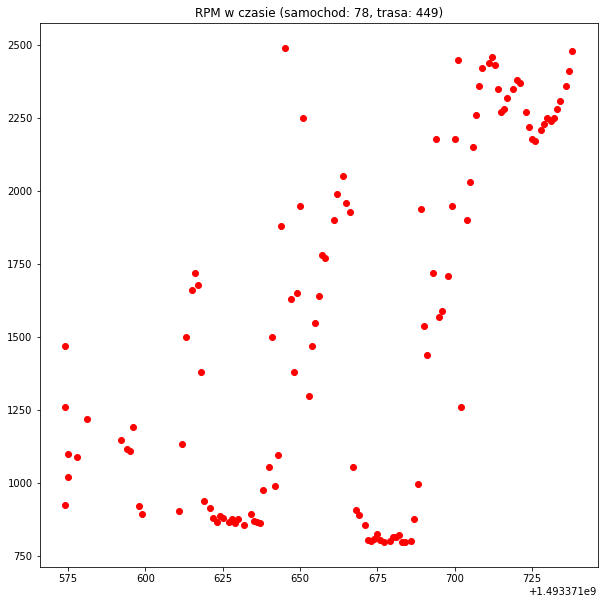

In [85]:
plt.figure(figsize=(10,10))
plt.scatter(df11_rpm['timestamp'], df11_rpm['result'], c='red')
plt.title('RPM w czasie (samochod: %s, trasa: %s)' % (vehicle_id, ride_id))
plt.show()

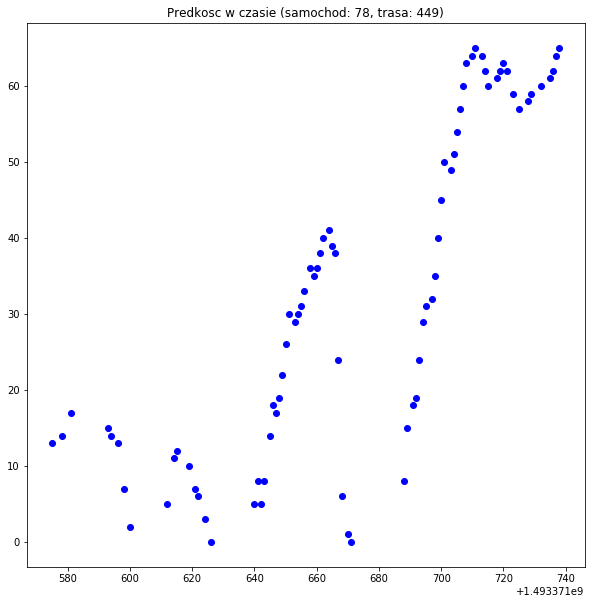

In [86]:
plt.figure(figsize=(10,10))
plt.scatter(df11_speed['timestamp'], df11_speed['result'], c='blue')
plt.title('Predkosc w czasie (samochod: %s, trasa: %s)' % (vehicle_id, ride_id))
plt.show()

In [34]:
df11_speed_rpm = df11.pivot(index='timestamp', columns='type', values='result')
#df11_speed_rpm.info()

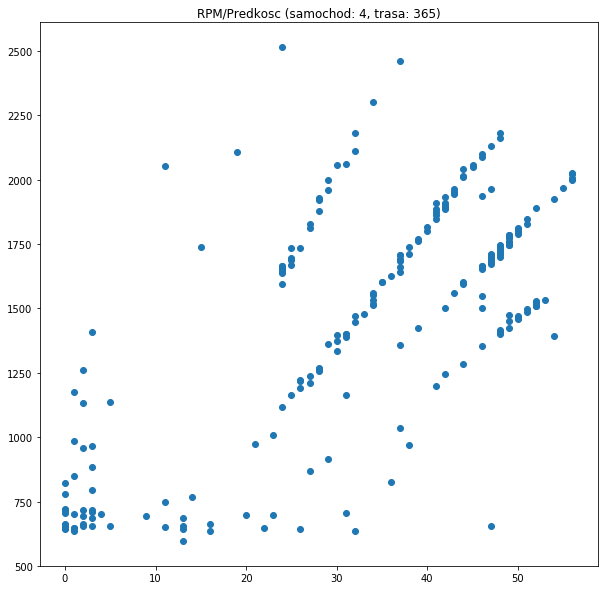

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(df11_speed_rpm['speed'], df11_speed_rpm['rpm'])
plt.title('RPM/Predkosc (samochod: %s, trasa: %s)' % (vehicle_id, ride_id))
plt.show()

In [93]:
vehicle_id = np.random.choice(vehicle_ids)
#vehicle_id = 25
df1 = df[df['vehicle_id']==vehicle_id]
df1_speed_rpm = df1.pivot(index='timestamp', columns='type', values='result')

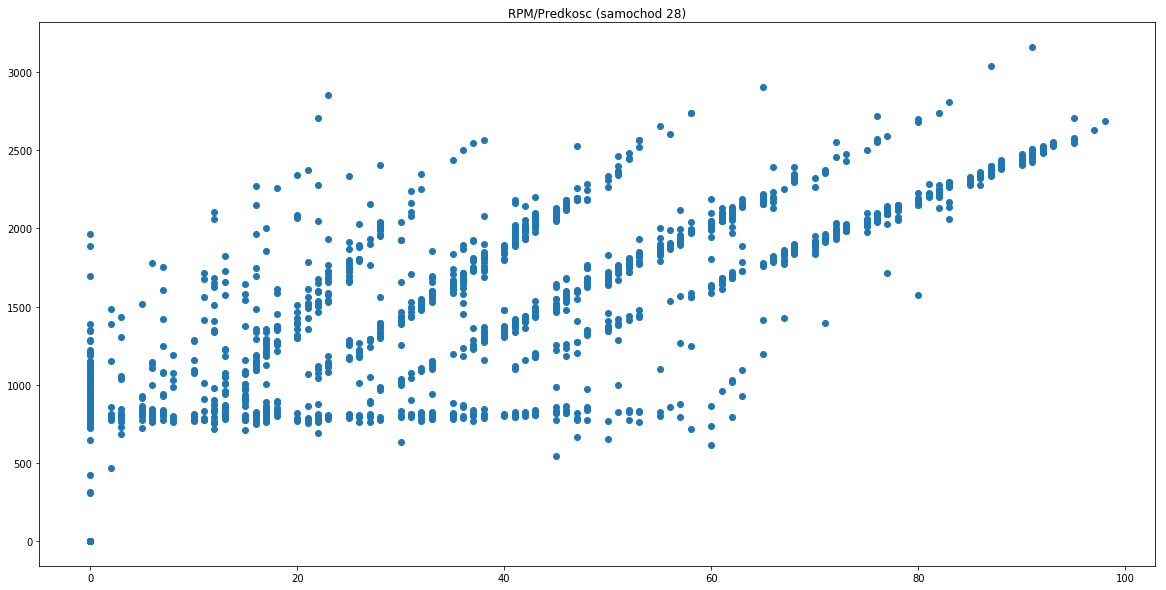

In [95]:
plt.figure(figsize=(20,10))
plt.scatter(df1_speed_rpm['speed'], df1_speed_rpm['rpm'])
plt.title('RPM/Predkosc (samochod %s)' % vehicle_id)
plt.show()